# Feature Engineering about Time Series Features
- 0820 회의  
- 0821 시작  
ref : 
https://dailyheumsi.tistory.com/m/109


In [ ]:
cd /content/drive/My Drive/빅콘/data

/content/drive/My Drive/빅콘/data


In [ ]:
# ready
import pandas as pd
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = "AppleGothic"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 데이터 로드 및 확인

In [ ]:
# data load ver3
#meta_02 = pd.read_excel('meta_v02_0819.xlsx')
item_meta = pd.read_excel('meta_v02_0819.xlsx')
#category = pd.read_excel('ns_shop_category.xlsx')
#sale_02 = pd.read_excel('sale_data_v02_0819.xlsx')
sale_data = pd.read_excel('sale_data_v03_0820.xlsx')
#smeta02 = pd.read_excel('sale_meta_v02_0819.xlsx')
sale_meta = pd.read_excel('sale_meta_v03_0820.xlsx')

print(item_meta.shape); print(sale_data.shape) ;print(sale_meta.shape)

(2042, 13)
(37372, 15)
(2042, 14)


In [ ]:
# item 별 데이터 약 2000개
item_meta.head(2)

,상품코드,상품명,상품군,판매단가,결제방법,상품명다시,단위,브랜드,옵션,종류,모델명,성별,NEW상품명
0,200944,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치
1,200942,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치


In [ ]:
# sale_meta :상품 설명에 new 상품 코드 추가
sale_meta.head(2)

,상품코드,상품명,상품군,판매단가,결제방법,상품명다시,단위,브랜드,옵션,종류,모델명,성별,NEW상품명,NEW상품코드
0,200944,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치,0
1,200942,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치,0


* 시계열 피쳐 생성 sale_data에서 진행

In [ ]:
# sale_data : 원래 origin data <- 시계열
sale_data.head(2)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0


### 결합상품

In [ ]:
item.columns

Index(['상품코드', '상품명', '상품군', '판매단가', '결제방법', '상품명다시', '단위', '브랜드', '옵션', '종류',
       '모델명', '성별', 'NEW상품명'],
      dtype='object')

In [ ]:
item[item['옵션'].notnull()].head()

,상품코드,상품명,상품군,판매단가,결제방법,상품명다시,단위,브랜드,옵션,종류,모델명,성별,NEW상품명
19,200790,구스터 티포트 1+1 세트,주방,69900,0,티포트,2세트,구스터,1+1,NaN,NaN,NaN,구스터 티포트 2세트
28,202373,굿프렌드 굿터치클리너 1+1,생활용품,39900,0,굿터치클리너,2,굿프렌드,1+1,NaN,NaN,NaN,굿프렌드 굿터치클리너 2
45,201675,2019년형 글라스락 퍼플클래식 유리밀폐용기 1+1세트(16조+4조),주방,78000,0,글라스락 퍼플 클래식 유리밀폐용기세트,NaN,글라스락,1+1,NaN,NaN,NaN,글라스락 글라스락 퍼플 클래식 유리밀폐용기세트
46,200620,2019 S/S 기라로쉬 올인원 선글라스,잡화,48900,0,2019 올인원 선글라스,NaN,기라로쉬,S/S,악세서리,NaN,NaN,기라로쉬 2019 올인원 선글라스
49,200361,까사마루 접이식 벤치 의자(2인),생활용품,39900,0,접이식 의자,NaN,까사마루,2인,NaN,NaN,NaN,까사마루 접이식 의자


In [ ]:
item['옵션'].value_counts()

2019 F/W        23
1+1             20
가방              14
2019 S/S        13
S/S             13
스탠드형            10
2IN1형           10
F/W              8
화이트              7
시즌2              7
8월               7
2019 F           7
7월               6
2019             4
19년 신제품          4
복합기+스피커          4
더블팩              4
무료체험             4
국내제조             3
리뉴얼              3
시즌4              3
프리미엄형            3
공기청정기            3
캐리어              2
앱할인              2
5kg+5kg          2
상의               2
KMD-970          2
세일               2
시즌3              2
단하루              2
싱글팩              2
청소기              2
선풍기              2
역시즌              2
가격인하             2
이데베논앰플           2
이녹스실버            2
ARS              2
스탠드              2
파격가              2
2in1             2
실버               2
1-1차             2
6월               2
초특가              2
2018 S/S         2
블랙케비어            2
5kg + 5kg        2
1차               2
시즌5              2
특등급              1
핑크          

### Time Series Features 설명
>1. 조기매진
> - 조기매진 (범주: 조기매진 1, 조기매진 x 0)
> 2. lag 피쳐
__취급액 기준으로 만들다가 생각해보니 타겟이 피쳐인거 아주 이상~ 판매단가로 고치자니 가격부분과 좀 겹침, 판매량 피쳐를 만들고 써야할듯__

> - 첫 방송에서의 판매량 (상품이 처음 방송되었을 때의 판매량) 
> - 이 상품의 저번 방송에서 판매량 
> - 지난 방송 동안의 평균 판매량 
> - 저번 달의 홈쇼핑 판매량
> - 저번 주의 홈쇼핑 판매량 
>- 어제의 홈쇼핑 판매량

#### 참고
> 4.4. 지난 달의 값들을 Feature 로 생성  
이번 달의 매출에는 저번 달의 매출과 연관이 있을 수도 있습니다.
이번에는 이러한 아이디어를 가지고 Feature 를 생성합니다.
구체적으로는, 해당 상점, 상품의 한 달전, 두 달전, 12달 전의 팔린 갯수와 주문 수를 이번 달의 Feature 로 가져옵니다.

#### 1. 조기매진  
범주형으로 조기매진 o 1, 조기매진 x 0 으로 만든다.  
조기매진이라는 것은 노출시간이 20분 이하일 때를 나타낸다.  
조기매진 될 당시 프로그램 중 가장 많은 취급액을 가진 데이터에 1로 표시, 나머지 0

<BarContainer object of 102 artists>

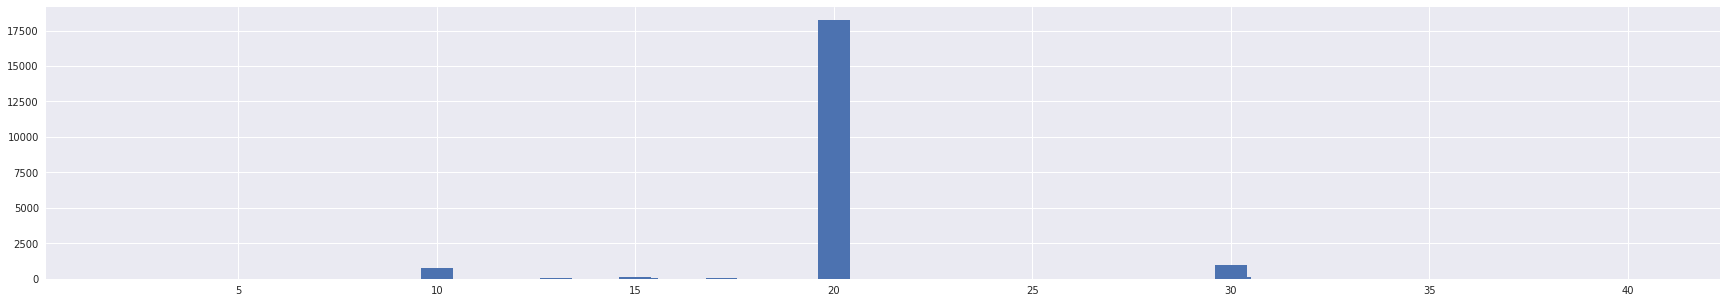

In [ ]:
show_time = sale_data['노출(분)'].value_counts()

plt.figure(figsize = (30,5))
plt.bar(show_time.index, show_time)

* 조기매진 갯수
    1.  20 분이하 조기 매진
    2.  20 - 30 분 사이 조기 매진

In [ ]:
sale_data[sale_data['노출(분)'] < 20].shape

(1223, 16)

20분 이하 조기 매진 1223개 예상

In [ ]:
sale_data[(sale_data['노출(분)'] > 20) & (sale_data['노출(분)'] < 30)].shape   

(31, 15)

노출시간이 20분과 30분 사이인 것은 31개  
총 조기매진 갯수 1223 + 31 = 1254 예상

In [ ]:
sale_data[(sale_data['노출(분)'] < 20) | (sale_data['노출(분)'].isnull())]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0
26,2019-01-01 14:00:00,NaN,100377,201226,그렉노먼 여성 구스다운 롱 벤치코트,의류,119000,20841000.0,23,그렉노먼 여성 구스다운 롱 벤치코트,0,NaN,그렉노먼,NaN,2
28,2019-01-01 14:30:00,NaN,100377,201226,그렉노먼 여성 구스다운 롱 벤치코트,의류,119000,47294000.0,23,그렉노먼 여성 구스다운 롱 벤치코트,0,NaN,그렉노먼,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37366,2019-12-31 23:40:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,817,쿠첸 압력밥솥 6인용,2,6인용,쿠첸,NaN,NaN
37367,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,817,쿠첸 압력밥솥 6인용,1,6인용,쿠첸,NaN,NaN
37369,2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,818,쿠첸 압력밥솥 10인용,1,10인용,쿠첸,NaN,NaN
37370,2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,817,쿠첸 압력밥솥 6인용,2,6인용,쿠첸,NaN,NaN


노출 시간이 20분 미만이거나 NaN 값인게 18007 개나 있삼  
들여다 보겠다

In [ ]:
sale_data['노출(분)'].isnull().sum()

16784

생각보다 노출 nan 값이 많아서 18000 개 중에 16000 개가 nan 이고 2000개가 20분 미만 노출 값이다^~^ 머람...

In [ ]:
sale_data[(sale_data['노출(분)'] < 20) | (sale_data['노출(분)'].isnull())][0:200]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0
26,2019-01-01 14:00:00,NaN,100377,201226,그렉노먼 여성 구스다운 롱 벤치코트,의류,119000,20841000.0,23,그렉노먼 여성 구스다운 롱 벤치코트,0,NaN,그렉노먼,NaN,2
28,2019-01-01 14:30:00,NaN,100377,201226,그렉노먼 여성 구스다운 롱 벤치코트,의류,119000,47294000.0,23,그렉노먼 여성 구스다운 롱 벤치코트,0,NaN,그렉노먼,NaN,2
45,2019-01-01 20:00:00,NaN,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,19123000.0,1133,LG 통돌이 세탁기,2,NaN,LG,NaN,세탁기
47,2019-01-01 20:20:00,NaN,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,58685000.0,1133,LG 통돌이 세탁기,2,NaN,LG,NaN,세탁기
49,2019-01-01 20:40:00,NaN,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,46068000.0,1133,LG 통돌이 세탁기,2,NaN,LG,NaN,세탁기
59,2019-01-02 00:00:00,NaN,100377,201231,그렉노먼 여성 캐시터치 터틀넥 4종,의류,69900,6445000.0,31,그렉노먼 여성 캐시터치 터틀넥 4종,0,4종,그렉노먼,NaN,0
61,2019-01-02 00:20:00,NaN,100377,201231,그렉노먼 여성 캐시터치 터틀넥 4종,의류,69900,8491000.0,31,그렉노먼 여성 캐시터치 터틀넥 4종,0,4종,그렉노먼,NaN,0


In [ ]:
#sale_data[sale_data['노출(분)'] == 17.1]
sale_data[345:351]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류
345,2019-01-05 01:00:00,20.0,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,15067000.0,4,가이거 제니스시계 주얼리세트,1,NaN,가이거,NaN,주얼리
346,2019-01-05 01:00:00,NaN,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,6857000.0,4,가이거 제니스시계 주얼리세트,2,NaN,가이거,NaN,주얼리
347,2019-01-05 01:20:00,20.0,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,30116000.0,4,가이거 제니스시계 주얼리세트,1,NaN,가이거,NaN,주얼리
348,2019-01-05 01:20:00,NaN,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,15561000.0,4,가이거 제니스시계 주얼리세트,2,NaN,가이거,NaN,주얼리
349,2019-01-05 01:40:00,17.1,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,20633000.0,4,가이거 제니스시계 주얼리세트,1,NaN,가이거,NaN,주얼리
350,2019-01-05 01:40:00,NaN,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,8495000.0,4,가이거 제니스시계 주얼리세트,2,NaN,가이거,NaN,주얼리


In [ ]:
# 조기매진 함수 : 시간의 nan 값 채워주기 전에 생성할 것
def sold_out_fill_time(df):
    # 조기매진 feature 생성
    df['조기매진'] = sale_data['노출(분)'].map(lambda x: 1 if ((x < 20) | (x > 20) & (x < 30)) else 0)     # 20분 이하, 20-30 분 사이
    # 방송일시의 nan 값 채워주는 부분
    df["노출(분)"] = df["노출(분)"].fillna(method='ffill')
    return df

In [ ]:
sold_out_fill_time(sale_data)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,817,쿠첸 압력밥솥 6인용,1,6인용,쿠첸,NaN,NaN,0
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,818,쿠첸 압력밥솥 10인용,2,10인용,쿠첸,NaN,NaN,0
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,818,쿠첸 압력밥솥 10인용,1,10인용,쿠첸,NaN,NaN,0
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,817,쿠첸 압력밥솥 6인용,2,6인용,쿠첸,NaN,NaN,0


In [ ]:
print(sale_data['노출(분)'].isnull().sum())
sale_data[345:351]     # 확인

0


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진
345,2019-01-05 01:00:00,20.0,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,15067000.0,4,가이거 제니스시계 주얼리세트,1,NaN,가이거,NaN,주얼리,0
346,2019-01-05 01:00:00,20.0,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,6857000.0,4,가이거 제니스시계 주얼리세트,2,NaN,가이거,NaN,주얼리,0
347,2019-01-05 01:20:00,20.0,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,30116000.0,4,가이거 제니스시계 주얼리세트,1,NaN,가이거,NaN,주얼리,0
348,2019-01-05 01:20:00,20.0,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,15561000.0,4,가이거 제니스시계 주얼리세트,2,NaN,가이거,NaN,주얼리,0
349,2019-01-05 01:40:00,17.1,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,20633000.0,4,가이거 제니스시계 주얼리세트,1,NaN,가이거,NaN,주얼리,1
350,2019-01-05 01:40:00,17.1,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,8495000.0,4,가이거 제니스시계 주얼리세트,2,NaN,가이거,NaN,주얼리,0


#### 2. lag 피쳐
__취급액 기준으로 만들다가 생각해보니 타겟이 피쳐인거 아주 이상~ 판매단가로 고치자니 가격부분과 좀 겹침, 판매량 피쳐를 만들고 써야할듯__

> - 첫 방송에서의 판매량 (상품이 처음 방송되었을 때의 판매량) 
> - 이 상품의 저번 방송에서 판매량 
> - 지난 방송 동안의 평균 판매량 
> - 저번 달의 홈쇼핑 판매량
> - 저번 주의 홈쇼핑 판매량 
>- 어제의 홈쇼핑 판매량

##### 2-1.이 상품의 첫 방송에서의 판매량

In [ ]:
sale_data.head(2)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0


In [ ]:
item_meta.head()

,상품코드,상품명,상품군,판매단가,결제방법,상품명다시,단위,브랜드,옵션,종류,모델명,성별,NEW상품명
0,200944,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치
1,200942,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치
2,200948,무이자[가이거] 무빙스타 다이아몬드 워치,잡화,129000,2,무빙스타 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 무빙스타 다이아몬드 워치
3,200951,일시불[가이거] 무빙스타 다이아몬드 워치,잡화,119000,1,무빙스타 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 무빙스타 다이아몬드 워치
4,200946,[무이자] 가이거 무빙스타 다이아몬드 워치+보석함,잡화,119000,2,무빙스타 다이아몬드 워치 + 보석함,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 무빙스타 다이아몬드 워치 + 보석함


In [ ]:
sale['첫방송 취급액'] = 0
sale_data['첫방송 취급액'] = sale_data['NEW상품명'].map(lambda x: sale_data['취급액'] if x in )

##### 2-2. 이 상품의 저번 방송에서 판매량

##### 2-3. 이 상품의 지난 방송 동안의 평균 판매량

##### 2-4. 저번달 판매량 평균
홈쇼핑이 저번달에 달성한 판매량 평균  

In [ ]:
def last_month_mean(df):
    df['저번달 취급액 평균'] = 0
    for i in range(2,13):
        last_month = df.query('"2019-{}"< 방송일시 < "2019-{}"'.format(i-1,i))    #['취급액'].mean()
        last_month_mean = last_month['취급액'].mean()
        df['저번달 취급액 평균'] = df['저번달 취급액 평균'].apply(lambda x: last_month_mean)
        #df.iloc[last_month.index[0]:last_month.shape[0]]['저번달 취급액 평균'] = last_month['저번달 취급액 평균'].apply(lambda x: last_month_mean)
        #df['저번달 취급액 평균'][:last_month.shape[0]+1] = last_month_mean
        #df.loc[[df['방송일시'] == last_month]['저번달 취급액 평균']] = last_month_mean
        #last_month['저번달 취급액 평균']
    return df    # 2.101446e+07

In [ ]:
def last_month_mean(df):
    df['저번달 취급액 평균'] = 0
    for i in range(2,13):
        last_month =df[(df['방송일시'] > '2019-{}'.format(i-1)) & (df['방송일시'] < '2019-{}'.format(i))]
        last_month_mean = last_month['취급액'].mean()
        
        df = df[(df['방송일시'] > '2019-{}'.format(i-1)) & (df['방송일시'] < '2019-{}'.format(i))].replace({'저번달 취급액 평균':last_month_mean})
    return df

In [ ]:
last_month_mean(sale_data)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진,저번달 취급액 평균


In [ ]:
sale_data

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진,저번달 취급액 평균
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,817,쿠첸 압력밥솥 6인용,1,6인용,쿠첸,NaN,NaN,0,0
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,818,쿠첸 압력밥솥 10인용,2,10인용,쿠첸,NaN,NaN,0,0
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,818,쿠첸 압력밥솥 10인용,1,10인용,쿠첸,NaN,NaN,0,0
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,817,쿠첸 압력밥솥 6인용,2,6인용,쿠첸,NaN,NaN,0,0


In [ ]:
def last_month_mean(df):
    df['저번달 취급액 평균'] = 0
    m = 2
    while m < 13:
        last_month =df[(df['방송일시'] > '2019-{}'.format(m-1)) & (df['방송일시'] < '2019-{}'.format(m))]
        last_month_mean = last_month['취급액'].mean()
        #df.iloc[last_month.index[0]:last_month.shape[0]]['저번달 취급액 평균'] = last_month['저번달 취급액 평균'].apply(lambda x: last_month_mean)
        last_month['저번달 취급액 평균'] = last_month['저번달 취급액 평균'].apply(lambda x: last_month_mean)
        m +=1
    return df

In [ ]:
last_month_mean(sale_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진,저번달 취급액 평균
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,817,쿠첸 압력밥솥 6인용,1,6인용,쿠첸,NaN,NaN,0,0
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,818,쿠첸 압력밥솥 10인용,2,10인용,쿠첸,NaN,NaN,0,0
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,818,쿠첸 압력밥솥 10인용,1,10인용,쿠첸,NaN,NaN,0,0
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,817,쿠첸 압력밥솥 6인용,2,6인용,쿠첸,NaN,NaN,0,0


In [ ]:
i = 2
sale_data['저번달 취급액 평균'] = 0
term = (sale_data['방송일시'] > '2019-{}'.format(i-1)) & (sale_data['방송일시'] < '2019-{}'.format(i))
last_month =sale_data[(sale_data['방송일시'] > '2019-{}'.format(i-1)) & (sale_data['방송일시'] < '2019-{}'.format(i))]
last_month_mean = last_month['취급액'].mean()
sale_data[(sale_data['방송일시'] > '2019-{}'.format(i-1)) & (sale_data['방송일시'] < '2019-{}'.format(i))]['저번달 취급액 평균'] = sale_data[term].apply(lambda x: last_month_mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
i = 3
sale_data['저번달 취급액 평균'] = 0
term = (sale_data['방송일시'] > '2019-{}'.format(i-1)) & (sale_data['방송일시'] < '2019-{}'.format(i))
last_month =sale_data[(sale_data['방송일시'] > '2019-{}'.format(i-1)) & (sale_data['방송일시'] < '2019-{}'.format(i))]
last_month_mean = last_month['취급액'].mean()
sale_data[(sale_data['방송일시'] > '2019-{}'.format(i-1)) & (sale_data['방송일시'] < '2019-{}'.format(i))]['저번달 취급액 평균'] = sale_data[term].apply(lambda x: last_month_mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sale_data.query('"2019-2"< 방송일시 < "2019-4"')#['저번달 취급액 평균'] = last_month_mean

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진,저번달 취급액 평균
2878,2019-02-01 00:20:00,20.0,100718,202108,로베르타 디 까메리노 올레이스 지퍼브라팬티,속옷,89900,31833000.0,162,로베르타 디 까메리노 여성 올레이스 지퍼브라팬티,0,NaN,로베르타 디 까메리노,NaN,4,0,0
2879,2019-02-01 00:40:00,20.0,100718,202108,로베르타 디 까메리노 올레이스 지퍼브라팬티,속옷,89900,47480000.0,162,로베르타 디 까메리노 여성 올레이스 지퍼브라팬티,0,NaN,로베르타 디 까메리노,NaN,4,0,0
2880,2019-02-01 01:00:00,20.0,100293,200953,일시불[가이거] 콘체르토 다이아몬드 워치(주얼리3종),잡화,129000,4343000.0,5,가이거 콘체르토 다이아몬드 워치(주얼라) 3종,1,3종,가이거,NaN,악세서리,0,0
2881,2019-02-01 01:00:00,20.0,100293,200950,무이자[가이거] 콘체르토 다이아몬드 워치(주얼리3종),잡화,139000,3003000.0,5,가이거 콘체르토 다이아몬드 워치(주얼라) 3종,2,3종,가이거,NaN,악세서리,0,0
2882,2019-02-01 01:20:00,20.0,100293,200953,일시불[가이거] 콘체르토 다이아몬드 워치(주얼리3종),잡화,129000,7168000.0,5,가이거 콘체르토 다이아몬드 워치(주얼라) 3종,1,3종,가이거,NaN,악세서리,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,2019-03-31 23:00:00,20.0,100148,200456,무이자 LG 울트라HD TV 75UK6200KNB,가전,3090000,7912000.0,1126,LG 울트라HD TV 75인치,2,75인치,LG,NaN,TV,0,0
8934,2019-03-31 23:20:00,20.0,100342,201060,아리스토우 남성오가닉티셔츠,의류,69900,12430000.0,531,아리스토우 남성 오가닉티셔츠,0,NaN,아리스토우,NaN,0,0,0
8935,2019-03-31 23:20:00,20.0,100342,201062,아리스토우 여성오가닉티셔츠,의류,69900,17337000.0,532,아리스토우 여성 오가닉티셔츠,0,NaN,아리스토우,NaN,0,0,0
8936,2019-03-31 23:40:00,20.0,100342,201060,아리스토우 남성오가닉티셔츠,의류,69900,24916000.0,531,아리스토우 남성 오가닉티셔츠,0,NaN,아리스토우,NaN,0,0,0


In [ ]:
last_month_mean(sale_data)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진,저번달 취급액 평균
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,817,쿠첸 압력밥솥 6인용,1,6인용,쿠첸,NaN,NaN,0,0
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,818,쿠첸 압력밥솥 10인용,2,10인용,쿠첸,NaN,NaN,0,0
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,818,쿠첸 압력밥솥 10인용,1,10인용,쿠첸,NaN,NaN,0,0
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,817,쿠첸 압력밥솥 6인용,2,6인용,쿠첸,NaN,NaN,0,0


In [ ]:
sale_data.query('방송일시 < "2019-03"')

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진,저번달 취급액 평균
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,2.731267e+07
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,2.731267e+07
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,2.731267e+07
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0,2.731267e+07
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0,2.731267e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,2019-02-28 22:40:00,20.0,100150,200533,일시불 LG 통돌이 세탁기,가전,439000,42665000.0,1133,LG 통돌이 세탁기,1,NaN,LG,NaN,세탁기,0,0.000000e+00
5686,2019-02-28 22:40:00,20.0,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,25387000.0,1133,LG 통돌이 세탁기,2,NaN,LG,NaN,세탁기,0,0.000000e+00
5687,2019-02-28 23:00:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,34255000.0,50,노비타 스마트 비데,0,NaN,노비타,NaN,NaN,0,0.000000e+00
5688,2019-02-28 23:20:00,20.0,100501,201514,노비타 스마트 비데,생활용품,189000,41495000.0,50,노비타 스마트 비데,0,NaN,노비타,NaN,NaN,0,0.000000e+00


In [ ]:
sale_data.query('"2019-1"< 방송일시 < "2019-2"')

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866,테이트 여성 셀린니트 3종,0,3종,테이트,NaN,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865,테이트 남성 셀린니트 3종,0,3종,테이트,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,2019-01-31 22:00:00,20.0,100574,201719,무이자 삼성 유로피안 냉장고RS82M6000S8,가전,1449000,7529000.0,439,삼성 유로피안 냉장고,2,NaN,삼성,NaN,냉장고,0
2873,2019-01-31 22:20:00,20.0,100574,201771,일시불 삼성 유로피안 냉장고RS82M6000S8,가전,1319000,13647000.0,439,삼성 유로피안 냉장고,1,NaN,삼성,NaN,냉장고,0
2874,2019-01-31 22:20:00,20.0,100574,201719,무이자 삼성 유로피안 냉장고RS82M6000S8,가전,1449000,7529000.0,439,삼성 유로피안 냉장고,2,NaN,삼성,NaN,냉장고,0
2875,2019-01-31 22:40:00,20.0,100574,201771,일시불 삼성 유로피안 냉장고RS82M6000S8,가전,1319000,30747000.0,439,삼성 유로피안 냉장고,1,NaN,삼성,NaN,냉장고,0


##### 2-5. 저번 주의 홈쇼핑 취급액

##### 2-6. 어제의 홈쇼핑 취급액

##### * 판매량
train set 에 있는것은 그렇다쳐도, test set 에 처음 나온 것은 가격대 별로 예측하거나 예측하는 모델을 만들어야할듯

In [ ]:
price_max = sale_data.groupby(['상품코드','판매단가']).agg(np.max)

In [ ]:
price_max = sale_data.groupby(['상품코드','판매단가']).max()
price_max

,,방송일시,노출(분),마더코드,상품명,상품군,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,조기매진
상품코드,판매단가,,,,,,,,,,,,,,
200000,79900,2019-08-30 01:40:00,20.0,100000,엘로엘 아쿠아클린 마스크,이미용,18195000.0,610,엘로엘 아쿠아클린 마스크,0,NaN,엘로엘,NaN,NaN,1
200001,99000,2019-02-01 13:30:00,30.0,100001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,52844000.0,482,스텐락 심플 스텐밀폐용기 17종,0,17종,스텐락,NaN,NaN,0
200002,49900,2019-12-13 17:00:00,20.0,100002,이보은의 우삽겹 12팩세트,농수축,52443000.0,1311,이보은의 우삼겹 세트 12팩,0,12팩,NaN,NaN,육류,0
200008,49800,2019-12-26 14:10:00,10.0,100006,AAA 19 F/W 남성 트레킹화 3종,잡화,24420000.0,1062,AAA 남성 트레킹화 3종,0,3종,AAA,F/W,신발,1
200009,49800,2019-12-26 14:10:00,10.0,100006,AAA 19 F/W 여성 트레킹화 3종,잡화,19596000.0,1063,AAA 여성 트레킹화 3종,0,3종,AAA,F/W,신발,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202505,199000,2019-09-23 14:30:00,30.0,100845,알비에로 마르티니 1A클라쎄 프리다 숄더백,잡화,3078000.0,569,알비에로 마르티니 1A클라쎄 프리다 숄더백,0,NaN,알비에로 마르티니 1A클라쎄,가방,NaN,0
202509,63900,2019-10-08 16:40:00,20.0,100849,19년 멋진밥상 흥양농협 햅쌀 20kg,농수축,92538000.0,1241,멋진밥상 흥양농협 햅쌀 20kg,0,20kg,NaN,NaN,쌀,0
202510,59900,2019-08-30 12:40:00,20.0,100849,멋진밥상 흥양농협 쌀 20kg,농수축,70772000.0,1240,멋진밥상 홍양농협 쌀 20kg,0,20kg,NaN,NaN,쌀,0


In [ ]:
price_max.columns

Index(['방송일시', '노출(분)', '마더코드', '상품명', '상품군', '취급액', 'NEW상품코드', 'NEW상품명',
       '결제방법', '단위', '브랜드', '옵션', '종류', '조기매진'],
      dtype='object')

In [ ]:
price_max = sale_data.groupby(['상품코드']).max()['판매단가'].reset_index()
price_max.rename(columns={'판매단가':'max 판매단가'}, inplace=True)
price_max.head()

,상품코드,max 판매단가
0,200000,79900
1,200001,99000
2,200002,49900
3,200008,49800
4,200009,49800


In [34]:
price_max = sale_data.groupby(['NEW상품코드'])['판매단가'].max().reset_index()
#price_max.rename(columns={'판매단가':'max 판매단가'}, inplace=True)
price_max.head()

,NEW상품코드,판매단가
0,0,178000
1,1,129000
2,2,119000
3,3,178000
4,4,139000


##### * 할인율